# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

Modelo inicial:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           5.30e-19
Time:                        16:48:40   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2017      

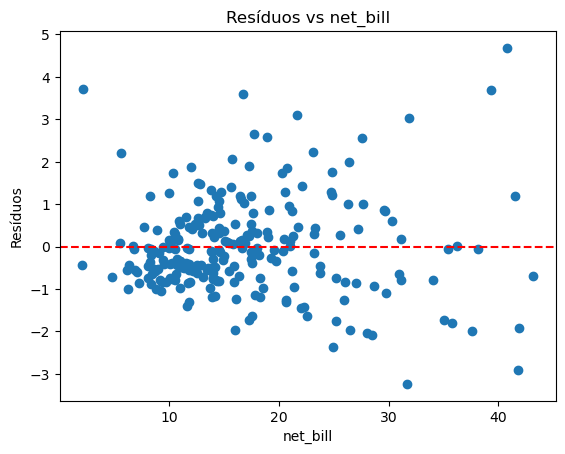


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           5.38e-19
Time:                        16:48:40   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.28

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices

# Carregar a base de dados
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']

# 1. Modelo inicial com todas as variáveis
y, X = dmatrices('tip ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')
modelo = sm.OLS(y, X).fit()
print("Modelo inicial:")
print(modelo.summary())

# 2. Remover variáveis não significantes (mantendo smoker + net_bill)
y, X = dmatrices('tip ~ smoker + net_bill', data=tips, return_type='dataframe')
modelo2 = sm.OLS(y, X).fit()
print("\nModelo reduzido (smoker + net_bill):")
print(modelo2.summary())

# 3. Gráfico de resíduos vs net_bill
residuos = modelo2.resid
plt.scatter(tips['net_bill'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill')
plt.show()

# 4. Teste com log(net_bill)
tips_log = tips[tips['net_bill'] > 0].copy()
tips_log['log_net_bill'] = np.log(tips_log['net_bill'])

y_log, X_log = dmatrices('tip ~ smoker + log_net_bill', data=tips_log, return_type='dataframe')
modelo_log = sm.OLS(y_log, X_log).fit()
print("\nModelo com log(net_bill):")
print(modelo_log.summary())

# 5. Teste com polinômio de 2º grau
tips['net_bill2'] = tips['net_bill']**2
y_poly, X_poly = dmatrices('tip ~ smoker + net_bill + net_bill2', data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y_poly, X_poly).fit()
print("\nModelo com polinômio (net_bill + net_bill^2):")
print(modelo_poly.summary())


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

Modelo inicial:
                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     12.97
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.12e-12
Time:                        16:50:09   Log-Likelihood:                -104.09
No. Observations:                 244   AIC:                             222.2
Df Residuals:                     237   BIC:                             246.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2853      

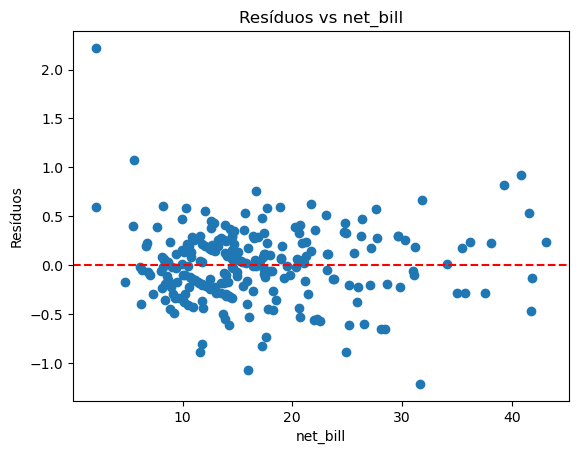


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     50.13
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           6.27e-19
Time:                        16:50:10   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.40

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.metrics import r2_score

# Carregar os dados
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Filtrar para evitar problemas com log
tips = tips[(tips['tip_pct'] > 0) & (tips['net_bill'] > 0)].copy()
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# 1. Modelo inicial com todas as variáveis
y, X = dmatrices('log_tip_pct ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')
modelo = sm.OLS(y, X).fit()
print("Modelo inicial:")
print(modelo.summary())

# 2. Remover variáveis não significantes
y2, X2 = dmatrices('log_tip_pct ~ smoker + net_bill', data=tips, return_type='dataframe')
modelo2 = sm.OLS(y2, X2).fit()
print("\nModelo reduzido (smoker + net_bill):")
print(modelo2.summary())

# 3. Gráfico de resíduos em função de net_bill
residuos = modelo2.resid
plt.scatter(tips['net_bill'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill')
plt.show()

# 4a. Teste com log(net_bill)
tips['log_net_bill'] = np.log(tips['net_bill'])
y3, X3 = dmatrices('log_tip_pct ~ smoker + log_net_bill', data=tips, return_type='dataframe')
modelo_log = sm.OLS(y3, X3).fit()
print("\nModelo com log(net_bill):")
print(modelo_log.summary())

# 4b. Teste com polinômio de segundo grau
tips['net_bill2'] = tips['net_bill']**2
y4, X4 = dmatrices('log_tip_pct ~ smoker + net_bill + net_bill2', data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y4, X4).fit()
print("\nModelo com polinômio (net_bill + net_bill^2):")
print(modelo_poly.summary())

# 5. Escolher o melhor modelo 

# Obter predições na escala do log
pred_log = modelo_log.fittedvalues

# Voltar para a escala original de tip_pct
pred_tip_pct = np.exp(pred_log)

# Calcular R² na escala original de tip_pct
r2_final = r2_score(tips['tip_pct'], pred_tip_pct)
print(f"\nR² na escala original de tip_pct (modelo final): {r2_final:.4f}")

# Comparação com o modelo (tip ~ net_bill)
modelo_tip = sm.OLS(tips['tip'], sm.add_constant(tips['net_bill'])).fit()
r2_tip = modelo_tip.rsquared
print(f"R² do modelo original (tip ~ net_bill): {r2_tip:.4f}")

# Conclusão 
if r2_final > r2_tip:
    print("→ O modelo final (log_tip_pct ~ smoker + log(net_bill)) tem melhor ajuste.")
else:
    print("→ O modelo original (tip ~ net_bill) tem melhor ajuste.")


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:57:02   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

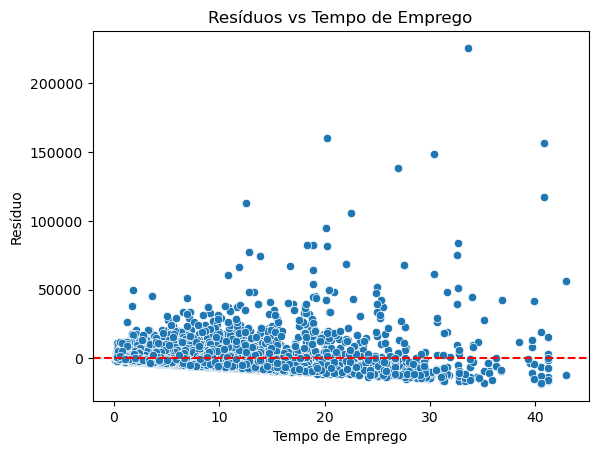

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:57:02   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

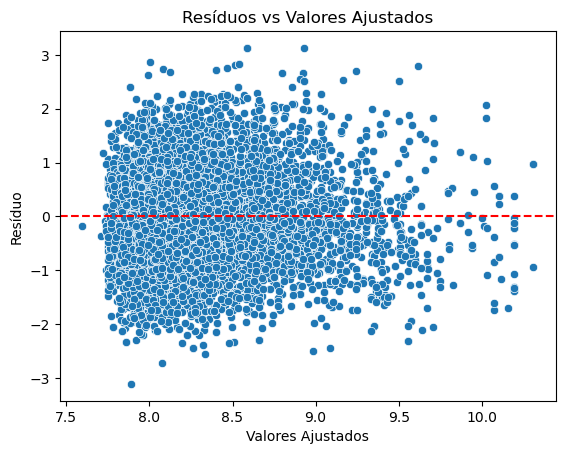

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

# 1. Carregando a base
df = pd.read_csv('previsao_de_renda.csv')

# Remover valores nulos de tempo_emprego e renda para regressão simples
df_simple = df[['renda', 'tempo_emprego']].dropna()

# 2. Regressão linear simples: renda ~ tempo_emprego
reg_simple = smf.ols('renda ~ tempo_emprego', data=df_simple).fit()
print(reg_simple.summary())

# 3. Análise de resíduos
sns.scatterplot(x=df_simple['tempo_emprego'], y=reg_simple.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Tempo de Emprego")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduo")
plt.show()

# 4. Melhorando: transformar renda (log)
df_simple['log_renda'] = np.log(df_simple['renda'])
reg_log = smf.ols('log_renda ~ tempo_emprego', data=df_simple).fit()
print(reg_log.summary())

# 5. Regressão linear múltipla (inicial)
df_multi = df.copy()
df_multi = df_multi.dropna()  # removendo NA para simplificação
df_multi['log_renda'] = np.log(df_multi['renda'])

# Modelo completo
formula = 'log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
reg_multi = smf.ols(formula, data=df_multi).fit()
print(reg_multi.summary())

# 6. Remover variáveis não significantes manualmente (baseado em p-value)
formula_final = 'log_renda ~ tipo_renda + educacao + idade + tempo_emprego + posse_de_imovel'
reg_final = smf.ols(formula_final, data=df_multi).fit()
print(reg_final.summary())

# 7. Análise de resíduos do modelo final
sns.scatterplot(x=reg_final.fittedvalues, y=reg_final.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduo")
plt.show()
